In [1]:
import pandas as pd
import numpy as np
from scipy import stats 

In [2]:
df_bioasq7b = pd.read_csv("./bioasq7b_eda.data")

In [3]:
df_bioasq7b.describe()

,question_len,num_word_in_question,answer_len,num_word_in_answer,num_word_in_token
count,5537.000000,5537.000000,5537.000000,5537.000000,5537.000000
mean,61.588044,15.928301,11.881524,4.584793,220.332671
std,22.998811,6.347655,13.558495,3.668981,75.967009
min,13.000000,5.000000,1.000000,1.000000,22.000000
25%,47.000000,12.000000,4.000000,3.000000,170.000000
50%,58.000000,14.000000,8.000000,4.000000,217.000000
75%,73.000000,18.000000,16.000000,6.000000,263.000000
max,168.000000,54.000000,282.000000,82.000000,878.000000


In [4]:
df_bioasq7b.head(2)

,id,question_len,num_word_in_question,answer_len,num_word_in_answer,num_word_in_token
0,56bc751eac7ad10019000013_001,46,14,14,5,119
1,56bc751eac7ad10019000013_002,46,14,14,5,119


In [5]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot_normal_dist(num_questions, ub=500, out_f_name="dist.pdf"):
    num_questions.sort()
    f_a_mean  = np.mean(num_questions)
    f_a_stdev = np.std(num_questions)
    a_a_fits = stats.norm.pdf(num_questions, f_a_mean, f_a_stdev)
    
    # plot
    fig, splot = plt.subplots(figsize=(5, 4))
    font      = {'family':'arial', 'style':'normal', 'size':16}
    axis_font = {'family':'arial', 'style':'normal', 'size':16}
    plt.rc('font', **font)
    
    
    splot.plot(num_questions, a_a_fits, linewidth=2.0, alpha =1.0, color = "g") # , label=st_label)
    
    ts_bins = np.arange(0.5, ub, 0.5)
    fo_factor  = 0.4
    fo_width   = 0.5
    ts_den, bins = np.histogram(num_questions, bins=ts_bins, density=True)
    ts_xvals = ts_bins[:len(ts_den)] - fo_factor/2. + 2/2.0*fo_factor
    splot.bar(ts_xvals, ts_den, width=fo_factor/2., color="b", edgecolor="White", 
              label="Wt", align="edge", alpha=0.8)
    
    splot.set_xlabel("Number of words", labelpad=8)
    splot.set_ylabel('Normalized frequency', labelpad=8)
    # plt.show()
    plt.savefig(out_f_name, format="pdf", dpi=600)

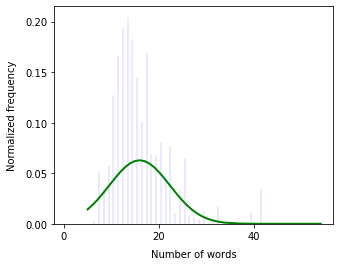

In [6]:
plot_normal_dist(list(df_bioasq7b["num_word_in_question"]), 50, "word_dist.pdf")

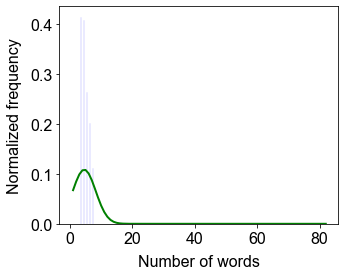

In [7]:
plot_normal_dist(list(df_bioasq7b["num_word_in_answer"]), 10, "answer_dist.pdf")

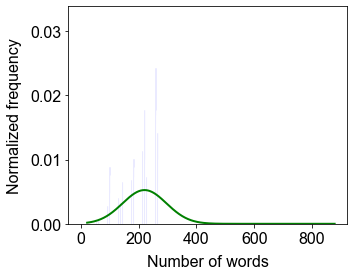

In [8]:
plot_normal_dist(list(df_bioasq7b["num_word_in_token"]), 300, "token_dist.pdf")